# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Import Data

In [3]:
import os
cwd = os.getcwd()
data_path = os.path.join(cwd, "data")

In [4]:
loan_data_backup = pd.read_csv(data_path + "/" + "loan.csv")

In [5]:
loan_data_backup.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000.0,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000.0,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
loan_data = loan_data_backup.copy()

# Explore Data

In [7]:
pd.options.display.max_columns = None

In [8]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,713xx,LA,26.52,0.0,Jun-1987,0.0,71.0,75.0,13.0,1.0,12315,24.2,44.0,w,29387.75,29387.75,1507.11,1507.11,612.25,894.86,0.0,0.0,0.0,Feb-2019,777.23,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,1208.0,321915.0,4.0,4.0,2.0,3.0,3.0,87153.0,88.0,4.0,5.0,998.0,57.0,50800.0,2.0,15.0,2.0,10.0,24763.0,13761.0,8.3,0.0,0.0,163.0,378.0,4.0,3.0,3.0,4.0,NaN,4.0,NaN,0.0,2.0,4.0,4.0,9.0,27.0,8.0,14.0,4.0,13.0,0.0,0.0,0.0,6.0,95.0,0.0,1.0,0.0,372872.0,99468.0,15000.0,94072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000.0,36 months,17.97,180.69,D,D1,Administrative,6 years,MORTGAGE,59280.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt cons

In [9]:
loan_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260668 entries, 0 to 2260667
Data columns (total 145 columns):
 #    Column                                      Dtype  
---   ------                                      -----  
 0    id                                          float64
 1    member_id                                   float64
 2    loan_amnt                                   int64  
 3    funded_amnt                                 int64  
 4    funded_amnt_inv                             float64
 5    term                                        object 
 6    int_rate                                    float64
 7    installment                                 float64
 8    grade                                       object 
 9    sub_grade                                   object 
 10   emp_title                                   object 
 11   emp_length                                  object 
 12   home_ownership                              object 
 13   annual_inc

# General Preprocessing

## Preprocessing few continuous variables

### Convert string to numeric

In [10]:
loan_data['emp_length'].unique()

array(['10+ years', '6 years', '4 years', '< 1 year', '2 years',
       '9 years', nan, '5 years', '3 years', '7 years', '1 year',
       '8 years'], dtype=object)

In [11]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a',str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')

In [12]:
type(loan_data['emp_length_int'][0])

str

In [13]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [14]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [15]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
loan_data['term_int'] = loan_data['term'].str.replace(' months','')

In [17]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [18]:
type(loan_data['term_int'][0])

numpy.int64

### Convert to datetime

In [19]:
loan_data['earliest_cr_line']

0          Apr-2001
1          Jun-1987
2          Apr-2011
3          Feb-2006
4          Dec-2000
             ...   
2260663    Jan-2004
2260664    Mar-2003
2260665    Feb-1995
2260666    Jul-2003
2260667    Apr-2014
Name: earliest_cr_line, Length: 2260668, dtype: object

In [20]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],
                                                   format = '%b-%Y')

In [21]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'],
                                                   format = '%b-%Y')

In [23]:
loan_data['issue_date'].head(5)

0   2018-12-01
1   2018-12-01
2   2018-12-01
3   2018-12-01
4   2018-12-01
Name: issue_date, dtype: datetime64[ns]

### Add new feature

In [24]:
pd.to_datetime('2019-01-01') - loan_data['earliest_cr_line_date']

0          6484 days
1         11537 days
2          2832 days
3          4717 days
4          6605 days
             ...    
2260663    5479 days
2260664    5785 days
2260665    8735 days
2260666    5663 days
2260667    1736 days
Name: earliest_cr_line_date, Length: 2260668, dtype: timedelta64[ns]

In [25]:
loan_data['mths_since_earliest_cr_line'] = round(
    pd.to_numeric(
        (pd.to_datetime('2019-01-01') - loan_data['earliest_cr_line_date']) 
        / np.timedelta64(1,'M') # precise conversion to month
))

In [26]:
loan_data['mths_since_issue_d'] = round(
    pd.to_numeric(
        (pd.to_datetime('2019-01-01') - loan_data['issue_date']) 
        / np.timedelta64(1,'M') # precise conversion to month
))

### Clean wrong data < 0

In [27]:
loan_data['mths_since_earliest_cr_line'].describe()

count    2.260639e+06
mean     2.286891e+02
std      9.416722e+01
min      3.800000e+01
25%      1.640000e+02
50%      2.130000e+02
75%      2.780000e+02
max      1.030000e+03
Name: mths_since_earliest_cr_line, dtype: float64

In [28]:
loan_data.loc[: ,
              ['earliest_cr_line','earliest_cr_line_date',
               'mths_since_earliest_cr_line']]\
    [loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line


In [29]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]=\
loan_data['mths_since_earliest_cr_line'].max()

In [30]:
min(loan_data['mths_since_earliest_cr_line'])

38.0

In [31]:
loan_data['earliest_cr_line_date'].describe()

count                 2260639
unique                    754
top       2004-09-01 00:00:00
freq                    15400
first     1933-03-01 00:00:00
last      2015-11-01 00:00:00
Name: earliest_cr_line_date, dtype: object

In [32]:
loan_data['mths_since_issue_d'].max()

139.0

In [33]:
loan_data['issue_date'].describe()

count                 2260668
unique                    139
top       2016-03-01 00:00:00
freq                    61992
first     2007-06-01 00:00:00
last      2018-12-01 00:00:00
Name: issue_date, dtype: object

## Preprocessing few discrete variables: create dummies

In [34]:
loan_data_dummies = [
    pd.get_dummies(loan_data['grade'],prefix='grade',prefix_sep=':'),
    pd.get_dummies(loan_data['sub_grade'],prefix='sub_grade',prefix_sep=':'),    
    pd.get_dummies(loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':'),    
    pd.get_dummies(loan_data['verification_status'],prefix='verification_status',prefix_sep=':'),    
    pd.get_dummies(loan_data['loan_status'],prefix='loan_status',prefix_sep=':'),    
    pd.get_dummies(loan_data['purpose'],prefix='purpose',prefix_sep=':'),    
    pd.get_dummies(loan_data['addr_state'],prefix='addr_state',prefix_sep=':'),    
    pd.get_dummies(loan_data['initial_list_status'],prefix='initial_list_status',prefix_sep=':') 
]

In [35]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [36]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [37]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis=1) 
# axix = 0 by row, axis = 1 by col

In [38]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

## Check for missing values and clean

In [39]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

id                                                                 2260668
member_id                                                          2260668
loan_amnt                                                                0
funded_amnt                                                              0
funded_amnt_inv                                                          0
term                                                                     0
int_rate                                                                 0
installment                                                              0
grade                                                                    0
sub_grade                                                                0
emp_title                                                           166969
emp_length                                                          146907
home_ownership                                                           0
annual_inc               

In [40]:
pd.options.display.max_rows = 100

### total revolving limit

In [41]:
# revolving limit: if missing, assume it is equal to funded amount of the loan
loan_data['total_rev_hi_lim'] = loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'])

In [42]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [43]:
loan_data.loc[:,['total_rev_hi_lim','funded_amnt']][loan_data['total_rev_hi_lim'].isnull()]

,total_rev_hi_lim,funded_amnt


### others

In [44]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

# Save to preprocessed data

In [45]:
loan_data.to_csv(data_path + "/" + "loan_data_preprocessed.csv")

# Dependent Variable 

## Default Definition: 1 for good, 0 for bad

In [46]:
loan_data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [47]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Fully Paid                                             0.460904
Current                                                0.406824
Charged Off                                            0.115742
Late (31-120 days)                                     0.009686
In Grace Period                                        0.003960
Late (16-30 days)                                      0.001653
Does not meet the credit policy. Status:Fully Paid     0.000879
Does not meet the credit policy. Status:Charged Off    0.000337
Default                                                0.000014
Name: loan_status, dtype: float64

In [48]:
# use np.where as if-statement
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin([
        'Charged Off',
        'Default',
        'Does not meet the credit policy. Status:Charged Off',
        'Late (31-120 days)']), 0, 1)

In [49]:
loan_data['good_bad'].value_counts()

1    1976324
0     284344
Name: good_bad, dtype: int64

# Save data

In [50]:
# loan_data.to_csv(data_path + "/" + "loan_data.csv", index=False)

# Load data

In [51]:
# loan_data_backup = pd.read_csv(data_path + "/" + "loan_data.csv")

In [52]:
# loan_data = loan_data_backup.copy()

# Modeling

## Split Data

In [53]:
X_train_data,X_test_data,y_train_data,y_test_data = train_test_split(loan_data.drop('good_bad',axis=1), 
                                                 loan_data['good_bad'],
                                                 test_size=0.2,
                                                 random_state=42)

In [54]:
# X_train.shape

In [55]:
# X_test.shape

In [56]:
# y_train.shape

In [57]:
# y_test.shape

## Preprocessing Discrete Variables

It is necessary to have only dummy variables as independent variables

### An Example: WoE and IV

In [59]:
df1 = pd.concat([X_train_data['grade'], y_train_data], axis=1)
df1.head()

,grade,good_bad
305053,D,1
50247,C,1
1630001,C,1
927626,C,1
758488,C,1


In [60]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()
# df1.groupby(['grade'], as_index = False).count()

,grade,good_bad
0,A,346505
1,B,531082
2,C,519884
3,D,259610
4,E,108133
5,F,33629
6,G,9691


In [61]:
df1 = pd.concat([df1.groupby(['grade'], as_index = False)['good_bad'].count(),
                 df1.groupby(['grade'], as_index = False)['good_bad'].mean()],
                 axis = 1)
df1 = df1.iloc[:, [0, 1, 3]]

In [62]:
df1.columns = ['grade', 'n_obs', 'prop_good']

In [63]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()

In [64]:
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,346505,0.965259,0.191594
1,B,531082,0.915842,0.293653
2,C,519884,0.859809,0.287462
3,D,259610,0.801394,0.143547
4,E,108133,0.721537,0.059790
5,F,33629,0.638615,0.018595
6,G,9691,0.603859,0.005358


In [65]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']

In [66]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()

In [67]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])

In [68]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop = True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,9691,0.603859,0.005358,5852.0,3839.0,0.003701,0.016891,-1.518224
1,F,33629,0.638615,0.018595,21476.0,12153.0,0.013582,0.053472,-1.370436
2,E,108133,0.721537,0.059790,78022.0,30111.0,0.049342,0.132485,-0.987695
3,D,259610,0.801394,0.143547,208050.0,51560.0,0.131573,0.226858,-0.544764
4,C,519884,0.859809,0.287462,447001.0,72883.0,0.282687,0.320676,-0.126090
5,B,531082,0.915842,0.293653,486387.0,44695.0,0.307596,0.196653,0.447347
6,A,346505,0.965259,0.191594,334467.0,12038.0,0.211520,0.052966,1.384674


In [69]:
df1['dff_prop_good'] = df1['prop_good'].diff().abs()
df1['diff_WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE
0,G,9691,0.603859,0.005358,5852.0,3839.0,0.003701,0.016891,-1.518224,NaN,NaN
1,F,33629,0.638615,0.018595,21476.0,12153.0,0.013582,0.053472,-1.370436,0.034756,0.147788
2,E,108133,0.721537,0.059790,78022.0,30111.0,0.049342,0.132485,-0.987695,0.082922,0.382740
3,D,259610,0.801394,0.143547,208050.0,51560.0,0.131573,0.226858,-0.544764,0.079857,0.442932
4,C,519884,0.859809,0.287462,447001.0,72883.0,0.282687,0.320676,-0.126090,0.058415,0.418673
5,B,531082,0.915842,0.293653,486387.0,44695.0,0.307596,0.196653,0.447347,0.056033,0.573438
6,A,346505,0.965259,0.191594,334467.0,12038.0,0.211520,0.052966,1.384674,0.049417,0.937327


In [70]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,G,9691,0.603859,0.005358,5852.0,3839.0,0.003701,0.016891,-1.518224,NaN,NaN,0.482686
1,F,33629,0.638615,0.018595,21476.0,12153.0,0.013582,0.053472,-1.370436,0.034756,0.147788,0.482686
2,E,108133,0.721537,0.059790,78022.0,30111.0,0.049342,0.132485,-0.987695,0.082922,0.382740,0.482686
3,D,259610,0.801394,0.143547,208050.0,51560.0,0.131573,0.226858,-0.544764,0.079857,0.442932,0.482686
4,C,519884,0.859809,0.287462,447001.0,72883.0,0.282687,0.320676,-0.126090,0.058415,0.418673,0.482686
5,B,531082,0.915842,0.293653,486387.0,44695.0,0.307596,0.196653,0.447347,0.056033,0.573438,0.482686
6,A,346505,0.965259,0.191594,334467.0,12038.0,0.211520,0.052966,1.384674,0.049417,0.937327,0.482686


### Automating Calculations: WoE & IV

In [71]:
def woe_discrete(df, x, y):
    df = pd.concat([df[x], y], axis = 1)
    df = pd.concat([
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
        ], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['dff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [73]:
df_temp = woe_discrete(X_test_data, 'grade', y_test_data)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,G,2477,0.607994,0.005478,1506.0,971.0,0.003812,0.017016,-1.495984,NaN,NaN,0.477452
1,F,8171,0.642271,0.018072,5248.0,2923.0,0.013284,0.051222,-1.349633,0.034278,0.146351,0.477452
2,E,27506,0.722206,0.060836,19865.0,7641.0,0.050282,0.133900,-0.979439,0.079935,0.370194,0.477452
3,D,64814,0.798331,0.143351,51743.0,13071.0,0.130972,0.229055,-0.558976,0.076125,0.420462,0.477452
4,C,130169,0.860366,0.287899,111993.0,18176.0,0.283477,0.318514,-0.116535,0.062036,0.442441,0.477452
5,B,132475,0.915222,0.292999,121244.0,11231.0,0.306893,0.196811,0.444258,0.054856,0.560793,0.477452
6,A,86522,0.964726,0.191364,83470.0,3052.0,0.211280,0.053483,1.373821,0.049504,0.929563,0.477452


### Visualizing Results

In [74]:
# overwrite the default maplotlib look with seaborn
sns.set()

In [75]:
def plot_by_woe(df_woe, rotation_of_x_axis_labels = 0):
    x = np.array(df_woe.iloc[:, 0].apply(str)) # turn into text strings in ndarray
    y = df_woe['WoE']
    # formatting
    plt.figure(figsize = (16, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_woe.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('WoE by ' + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

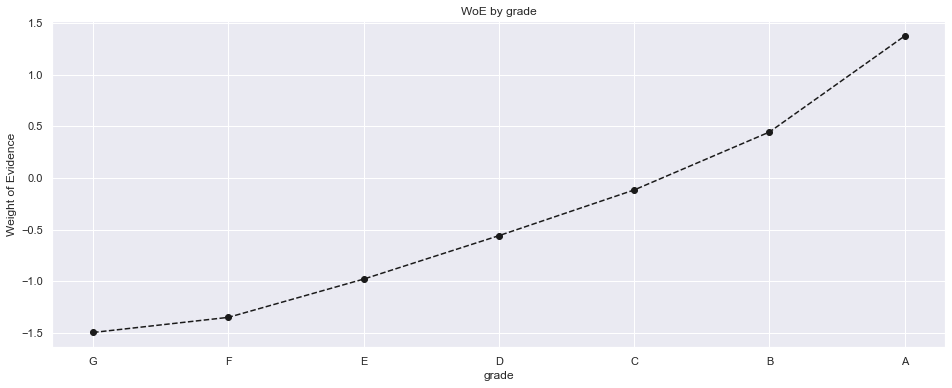

In [76]:
plot_by_woe(df_temp)

### Creating Dummy Variables

In [77]:
X_train = X_train_data
y_train = y_train_data
# X_test = X_test_data
# y_test = y_test_data

#### home ownership

In [120]:
df_temp = woe_discrete(X_train, 'home_ownership', y_train)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,OTHER,40,0.725000,0.000088,29.0,11.0,0.000073,0.000193,-0.965469,NaN,NaN,0.026633
1,NONE,11,0.818182,0.000024,9.0,2.0,0.000023,0.000035,-0.430792,0.093182,0.534677,0.026633
2,RENT,179168,0.852490,0.396272,152739.0,26429.0,0.386613,0.463139,-0.180601,0.034309,0.250191,0.026633
3,OWN,50497,0.874230,0.111686,44146.0,6351.0,0.111743,0.111294,0.004021,0.021740,0.184621,0.026633
4,MORTGAGE,222246,0.890833,0.491549,197984.0,24262.0,0.501138,0.425164,0.164405,0.016603,0.160385,0.026633
5,ANY,172,0.941860,0.000380,162.0,10.0,0.000410,0.000175,0.850142,0.051028,0.685736,0.026633


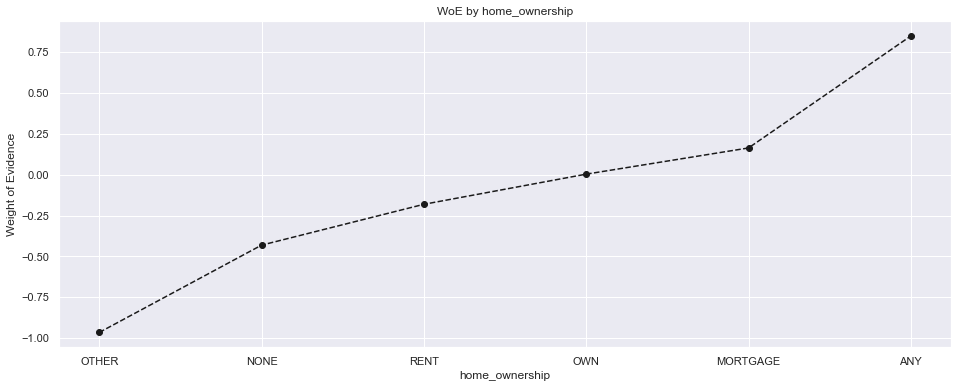

In [121]:
plot_by_woe(df_temp)

In [122]:
X_train['home_ownership:RENT_OTHER_NONE_ANY'] = sum([X_train['home_ownership:RENT'],
                                                    X_train['home_ownership:OTHER'],
                                                    X_train['home_ownership:NONE'],
                                                    X_train['home_ownership:ANY']])

#### address state

In [123]:
df_temp = woe_discrete(X_train, 'addr_state', y_train)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,AL,5492,0.848871,0.012147,4662.0,830.0,0.011800,0.014545,-0.209095,NaN,NaN,inf
1,LA,5242,0.849866,0.011594,4455.0,787.0,0.011277,0.013791,-0.201315,0.000995,0.007780,inf
2,AR,3502,0.852085,0.007745,2984.0,518.0,0.007553,0.009077,-0.183825,0.002218,0.017491,inf
3,OK,4176,0.853209,0.009236,3563.0,613.0,0.009019,0.010742,-0.174876,0.001124,0.008949,inf
4,NV,6541,0.855374,0.014467,5595.0,946.0,0.014162,0.016578,-0.157483,0.002165,0.017393,inf
5,MS,2574,0.855866,0.005693,2203.0,371.0,0.005576,0.006501,-0.153496,0.000493,0.003987,inf
6,NY,37323,0.860622,0.082549,32121.0,5202.0,0.081305,0.091159,-0.114403,0.004756,0.039094,inf
7,IN,7395,0.861934,0.016356,6374.0,1021.0,0.016134,0.017892,-0.103425,0.001312,0.010978,inf
8,NM,2363,0.865425,0.005226,2045.0,318.0,0.005176,0.005573,-0.073768,0.003492,0.029657,inf
9,FL,32263,0.866348,0.071357,27951.0,4312.0,0.070750,0.075563,-0.065818,0.000923,0.007949,inf


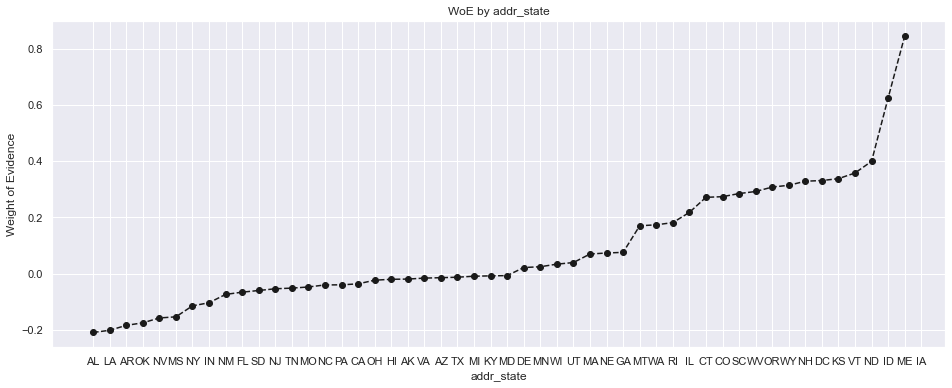

In [124]:
plot_by_woe(df_temp)

state ND is missing in our data. add it as a dummy variable in case it is used.

In [125]:
if ['addr_state:ND'] in X_train.columns.values:
    pass
else:
    X_train['addr_state:ND'] = 0

In [126]:
#plot_by_woe(df_temp.iloc[1: -2, :])

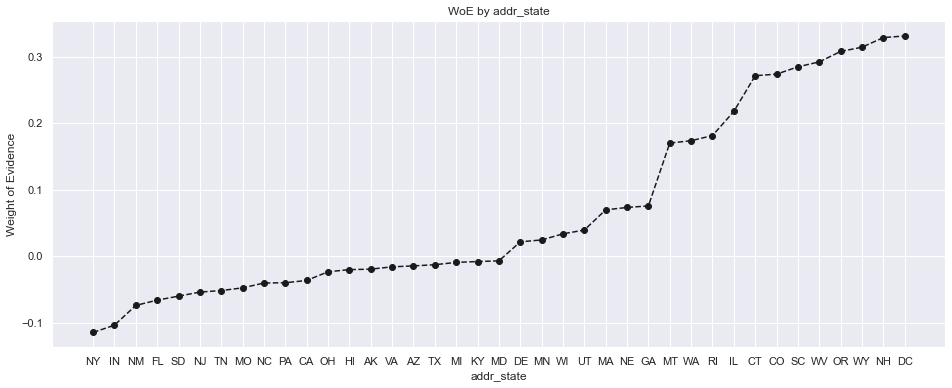

In [127]:
plot_by_woe(df_temp.iloc[6: -6, :])

In [128]:
X_train['addr_state:ND_IA_AL_AR_MS_OK_LA'] = sum([
                           X_train['addr_state:ND'],
                           X_train['addr_state:IA'],
                           X_train['addr_state:AL'],
                           X_train['addr_state:AR'],
                           X_train['addr_state:MS'],
                           X_train['addr_state:OK'],
                           X_train['addr_state:LA']])
X_train['addr_state:NV_NM_HI_SD'] = sum([
                           X_train['addr_state:NV'],
                           X_train['addr_state:NM'],
                           X_train['addr_state:HI'],
                           X_train['addr_state:SD']])
X_train['addr_state:MO_MD_NC'] = sum([
                           X_train['addr_state:MO'],
                           X_train['addr_state:MD'],
                           X_train['addr_state:NC']])
X_train['addr_state:PA_KY_TN'] = sum([
                           X_train['addr_state:PA'],
                           X_train['addr_state:KY'],
                           X_train['addr_state:TN']])
X_train['addr_state:NJ_MI_IN'] = sum([
                           X_train['addr_state:NJ'],
                           X_train['addr_state:MI'],
                           X_train['addr_state:IN']])
X_train['addr_state:VA_MN_AK'] = sum([
                           X_train['addr_state:VA'],
                           X_train['addr_state:MN'],
                           X_train['addr_state:AK']])
X_train['addr_state:AZ_NE_OH'] = sum([
                           X_train['addr_state:AZ'],
                           X_train['addr_state:NE'],
                           X_train['addr_state:OH']])
X_train['addr_state:DE_MA_UT_WI'] = sum([
                           X_train['addr_state:DE'],
                           X_train['addr_state:MA'],
                           X_train['addr_state:UT'],
                           X_train['addr_state:WI']])
X_train['addr_state:GA_RI_WY_IL_MT_KS'] = sum([
                           X_train['addr_state:GA'],
                           X_train['addr_state:RI'],
                           X_train['addr_state:WY'],
                           X_train['addr_state:IL'],
                           X_train['addr_state:MT'],
                           X_train['addr_state:KS']])
X_train['addr_state:CT_ND_WA_CO_SC'] = sum([
                           X_train['addr_state:CT'],
                           X_train['addr_state:ND'],
                           X_train['addr_state:WA'],
                           X_train['addr_state:CO'],
                           X_train['addr_state:SC']])
X_train['addr_state:WV_OR_NH_DC_ID_VT_ME'] = sum([
                           X_train['addr_state:WV'],
                           X_train['addr_state:OR'],
                           X_train['addr_state:NH'],
                           X_train['addr_state:DC'],
                           X_train['addr_state:ID'],
                           X_train['addr_state:VT'],
                           X_train['addr_state:ME']])

## Preprocessing Continuous Variables

### Automating Calculations and Visualizing Results

In [129]:
def woe_ordered_continuous(df, x, y):
    df = pd.concat([df[x], y], axis = 1)
    df = pd.concat([
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
        df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()
        ], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['dff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

### Creating Dummy Variables

#### term

In [130]:
df_temp = woe_ordered_continuous(X_train, 'term_int', y_train)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,36,321675,0.891819,0.711459,286876.0,34799.0,0.726142,0.609813,0.174592,NaN,NaN,0.061492
1,60,130459,0.829326,0.288541,108193.0,22266.0,0.273858,0.390187,-0.354014,0.062494,0.528606,0.061492


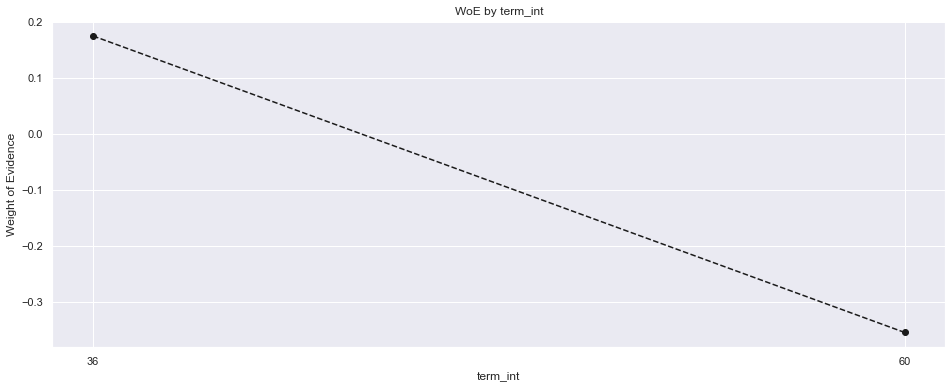

In [131]:
plot_by_woe(df_temp)

In [132]:
X_train['term:36'] = np.where((X_train['term_int'] == 36), 1, 0)
X_train['term:60'] = np.where((X_train['term_int'] == 60), 1, 0)

#### employment length

In [133]:
df_temp = woe_ordered_continuous(X_train, 'emp_length_int', y_train)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,0.0,67183,0.860962,0.148591,57842.0,9341.0,0.146410,0.163691,-0.111568,NaN,NaN,0.004654
1,1.0,29755,0.871820,0.065810,25941.0,3814.0,0.065662,0.066836,-0.017723,0.010858,0.093844,0.004654
2,2.0,40636,0.872798,0.089876,35467.0,5169.0,0.089774,0.090581,-0.008946,0.000978,0.008777,0.004654
3,3.0,36148,0.873409,0.079950,31572.0,4576.0,0.079915,0.080189,-0.003424,0.000612,0.005522,0.004654
4,4.0,27396,0.873558,0.060593,23932.0,3464.0,0.060577,0.060703,-0.002077,0.000149,0.001347,0.004654
5,5.0,27908,0.877240,0.061725,24482.0,3426.0,0.061969,0.060037,0.031675,0.003681,0.033752,0.004654
6,6.0,20566,0.875814,0.045487,18012.0,2554.0,0.045592,0.044756,0.018508,0.001425,0.013167,0.004654
7,7.0,18674,0.868909,0.041302,16226.0,2448.0,0.041071,0.042898,-0.043526,0.006906,0.062034,0.004654
8,8.0,18472,0.862711,0.040855,15936.0,2536.0,0.040337,0.044441,-0.096877,0.006198,0.053351,0.004654
9,9.0,15822,0.866199,0.034994,13705.0,2117.0,0.034690,0.037098,-0.067109,0.003488,0.029768,0.004654


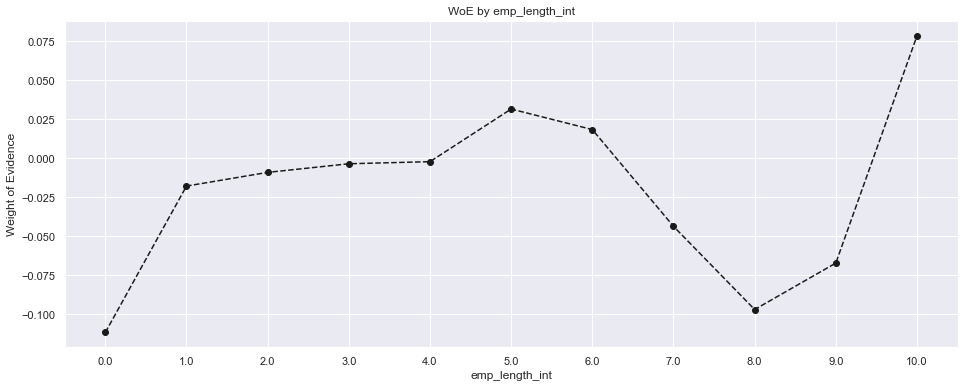

In [134]:
plot_by_woe(df_temp)

In [135]:
X_train['emp_length:0'] = np.where((X_train['emp_length_int'].isin([0])), 1, 0)
X_train['emp_length:1'] = np.where((X_train['emp_length_int'].isin([1])), 1, 0)
X_train['emp_length:2-6'] = np.where((X_train['emp_length_int'].isin(range(2, 7))), 1, 0)
X_train['emp_length:7-9'] = np.where((X_train['emp_length_int'].isin(range(7, 10))), 1, 0)
X_train['emp_length:10'] = np.where((X_train['emp_length_int'].isin([10])), 1, 0)

#### months since issue date

In [136]:
X_train['mths_since_issue_d_factor'] = pd.cut(X_train['mths_since_issue_d'], 50 )

In [137]:
df_temp = woe_ordered_continuous(X_train, 'mths_since_issue_d_factor', y_train)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(0.862, 3.76]",25528,0.996279,0.056461,25433.0,95.0,0.064376,0.001665,3.655056,NaN,NaN,0.549553
1,"(3.76, 6.52]",25589,0.983352,0.056596,25163.0,426.0,0.063693,0.007465,2.143821,0.012926,1.511235,0.549553
2,"(6.52, 9.28]",26209,0.962265,0.057967,25220.0,989.0,0.063837,0.017331,1.303829,0.021087,0.839992,0.549553
3,"(9.28, 12.04]",21496,0.946967,0.047543,20356.0,1140.0,0.051525,0.019977,0.947478,0.015298,0.356351,0.549553
4,"(12.04, 14.8]",16173,0.926606,0.035770,14986.0,1187.0,0.037933,0.020801,0.600818,0.020361,0.346660,0.549553
5,"(14.8, 17.56]",24198,0.902099,0.053520,21829.0,2369.0,0.055254,0.041514,0.285902,0.024507,0.314916,0.549553
6,"(17.56, 20.32]",23126,0.893064,0.051149,20653.0,2473.0,0.052277,0.043337,0.187559,0.009035,0.098343,0.549553
7,"(20.32, 23.08]",19078,0.883216,0.042195,16850.0,2228.0,0.042651,0.039043,0.088377,0.009848,0.099182,0.549553
8,"(23.08, 25.84]",13657,0.863074,0.030206,11787.0,1870.0,0.029835,0.032770,-0.093811,0.020142,0.182188,0.549553
9,"(25.84, 28.6]",19221,0.851829,0.042512,16373.0,2848.0,0.041443,0.049908,-0.185853,0.011245,0.092042,0.549553


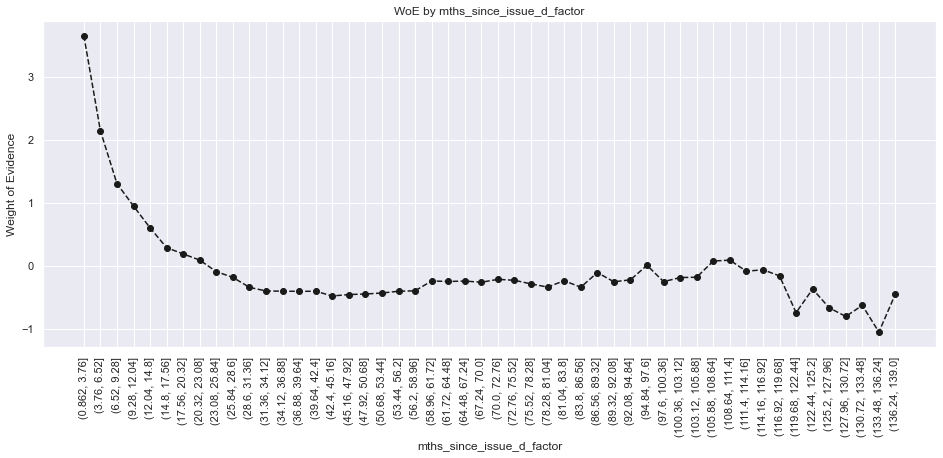

In [138]:
plot_by_woe(df_temp, 90)

In [139]:
#plot_by_woe(df_temp.iloc[15: , :], 90)

In [140]:
X_train['mths_since_issue_d:<4'] = np.where((X_train['mths_since_issue_d'].isin(range(4))), 1, 0)
X_train['mths_since_issue_d:4-6'] = np.where((X_train['mths_since_issue_d'].isin(range(4,7))), 1, 0)
X_train['mths_since_issue_d:7-9'] = np.where((X_train['mths_since_issue_d'].isin(range(7,10))), 1, 0)
X_train['mths_since_issue_d:10-12'] = np.where((X_train['mths_since_issue_d'].isin(range(10,13))), 1, 0)
X_train['mths_since_issue_d:13-14'] = np.where((X_train['mths_since_issue_d'].isin(range(13,15))), 1, 0)
X_train['mths_since_issue_d:15-17'] = np.where((X_train['mths_since_issue_d'].isin(range(15,18))), 1, 0)
X_train['mths_since_issue_d:18-23'] = np.where((X_train['mths_since_issue_d'].isin(range(18,24))), 1, 0)
X_train['mths_since_issue_d:24-28'] = np.where((X_train['mths_since_issue_d'].isin(range(24,29))), 1, 0)
X_train['mths_since_issue_d:29-58'] = np.where((X_train['mths_since_issue_d'].isin(range(29,59))), 1, 0)
X_train['mths_since_issue_d:59-75'] = np.where((X_train['mths_since_issue_d'].isin(range(59,76))), 1, 0)
X_train['mths_since_issue_d:76-86'] = np.where((X_train['mths_since_issue_d'].isin(range(76,87))), 1, 0)
X_train['mths_since_issue_d:87-125'] = np.where((X_train['mths_since_issue_d'].isin(range(87,126))), 1, 0)
X_train['mths_since_issue_d:>126'] = np.where((X_train['mths_since_issue_d'].isin(range(126,
                                                        int(X_train['mths_since_issue_d'].max())))), 1, 0)

#### interest rate

In [141]:
df_prep_temp = X_train
df_prep_temp['int_rate_factor'] = pd.cut(df_prep_temp['int_rate'], 50)

In [142]:
df_temp = woe_ordered_continuous(df_prep_temp, 'int_rate_factor', y_train)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(5.284, 5.824]",11360,0.980194,0.025125,11135.0,225.0,0.028185,0.003943,1.966879,NaN,NaN,0.467865
1,"(5.824, 6.337]",9727,0.982523,0.021514,9557.0,170.0,0.024191,0.002979,2.094361,0.002329,0.127483,0.467865
2,"(6.337, 6.851]",10360,0.973166,0.022914,10082.0,278.0,0.025520,0.004872,1.656016,0.009357,0.438345,0.467865
3,"(6.851, 7.364]",18788,0.967373,0.041554,18175.0,613.0,0.046005,0.010742,1.454568,0.005793,0.201448,0.467865
4,"(7.364, 7.878]",10985,0.959490,0.024296,10540.0,445.0,0.026679,0.007798,1.229989,0.007883,0.224579,0.467865
5,"(7.878, 8.392]",27795,0.935852,0.061475,26012.0,1783.0,0.065842,0.031245,0.745391,0.023638,0.484598,0.467865
6,"(8.392, 8.905]",7414,0.945913,0.016398,7013.0,401.0,0.017751,0.007027,0.926690,0.010061,0.181299,0.467865
7,"(8.905, 9.419]",9198,0.905740,0.020344,8331.0,867.0,0.021087,0.015193,0.327830,0.040173,0.598860,0.467865
8,"(9.419, 9.932]",20014,0.936694,0.044266,18747.0,1267.0,0.047452,0.022203,0.759512,0.030954,0.431682,0.467865
9,"(9.932, 10.446]",15804,0.933055,0.034954,14746.0,1058.0,0.037325,0.018540,0.699722,0.003639,0.059790,0.467865


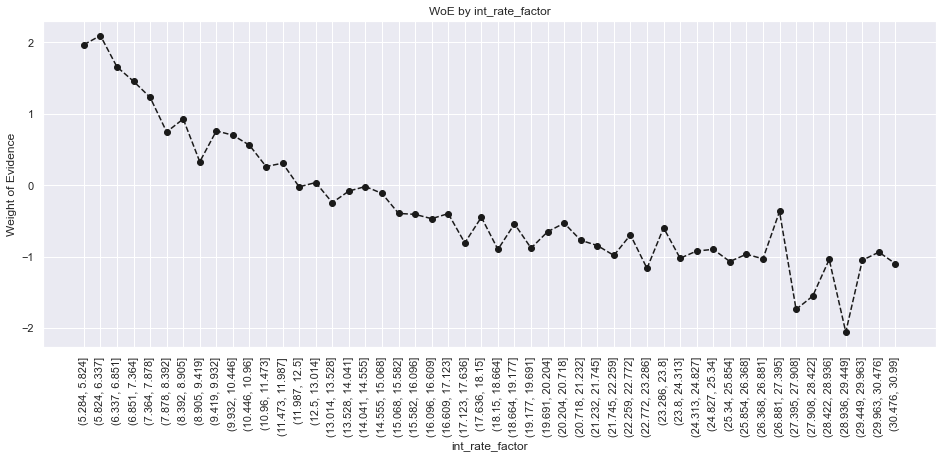

In [143]:
plot_by_woe(df_temp, 90)

In [144]:
X_train['int_rate:<7.878'] = np.where((X_train['int_rate'] <= 7.878), 1, 0)
X_train['int_rate:7.878-10.96'] = np.where(((X_train['int_rate'] > 7.878) & (X_train['int_rate'] <= 10.96)), 1, 0)
X_train['int_rate:10.96-13.014'] = np.where(((X_train['int_rate'] > 10.96) & (X_train['int_rate'] <= 13.014)), 1, 0)
X_train['int_rate:13.014-15.068'] = np.where(((X_train['int_rate'] > 13.014) & (X_train['int_rate'] <= 15.068)), 1, 0)
X_train['int_rate:15.068-20.718'] = np.where(((X_train['int_rate'] > 15.068) & (X_train['int_rate'] <= 20.718)), 1, 0)
X_train['int_rate:>20.718'] = np.where((X_train['int_rate'] > 20.718), 1, 0)

#### funded amount

In [145]:
df_prep_temp = X_train
df_prep_temp['funded_amnt_factor'] = pd.cut(df_prep_temp['funded_amnt'], 50)

In [146]:
df_temp = woe_ordered_continuous(df_prep_temp, 'funded_amnt_factor', y_train)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(460.5, 1290.0]",2828,0.914427,0.006255,2586.0,242.0,0.006546,0.004241,0.434060,NaN,NaN,0.042764
1,"(1290.0, 2080.0]",6472,0.905284,0.014314,5859.0,613.0,0.014830,0.010742,0.322500,0.009143,0.111561,0.042764
2,"(2080.0, 2870.0]",5629,0.902647,0.012450,5081.0,548.0,0.012861,0.009603,0.292119,0.002637,0.030381,0.042764
3,"(2870.0, 3660.0]",12485,0.896996,0.027613,11199.0,1286.0,0.028347,0.022536,0.229418,0.005651,0.062700,0.042764
4,"(3660.0, 4450.0]",9815,0.893734,0.021708,8772.0,1043.0,0.022204,0.018277,0.194594,0.003262,0.034824,0.042764
5,"(4450.0, 5240.0]",23491,0.895875,0.051956,21045.0,2446.0,0.053269,0.042863,0.217340,0.002141,0.022745,0.042764
6,"(5240.0, 6030.0]",21098,0.892881,0.046663,18838.0,2260.0,0.047683,0.039604,0.185642,0.002994,0.031698,0.042764
7,"(6030.0, 6820.0]",6836,0.870099,0.015119,5948.0,888.0,0.015056,0.015561,-0.033031,0.022781,0.218673,0.042764
8,"(6820.0, 7610.0]",15698,0.884635,0.034720,13887.0,1811.0,0.035151,0.031736,0.102205,0.014536,0.135235,0.042764
9,"(7610.0, 8400.0]",19935,0.879960,0.044091,17542.0,2393.0,0.044402,0.041935,0.057181,0.004675,0.045024,0.042764


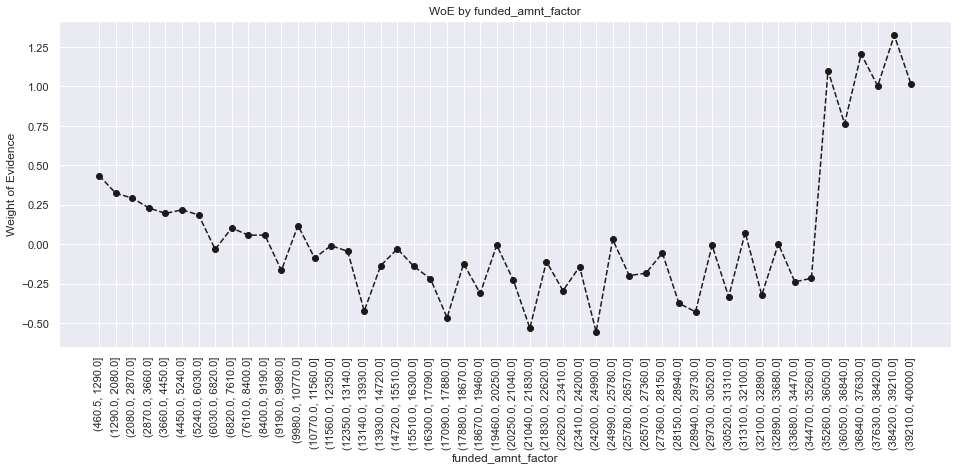

In [147]:
plot_by_woe(df_temp, 90)

too much variation. drop this feature so no need to create dummies

#### annual income

In [148]:
# X_train['annual_inc_factor'] = pd.cut(X_train['annual_inc'], 100)

In [149]:
# df_temp = woe_ordered_continuous(X_train, 'annual_inc_factor', y_train)
# df_temp

In [150]:
df_prep_temp = X_train.loc[X_train['annual_inc'] <= 252573.72,:]

In [151]:
df_prep_temp['annual_inc_factor'] = pd.cut(df_prep_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_prep_temp, 'annual_inc_factor', y_train[df_prep_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(-252.5, 5050.0]",536,0.930970,0.001199,499.0,37.0,0.001279,0.000653,0.672244,NaN,NaN,0.033804
1,"(5050.0, 10100.0]",698,0.868195,0.001562,606.0,92.0,0.001553,0.001623,-0.044352,0.062775,0.716597,0.033804
2,"(10100.0, 15150.0]",2407,0.845035,0.005385,2034.0,373.0,0.005211,0.006580,-0.233263,0.023160,0.188910,0.033804
3,"(15150.0, 20200.0]",4943,0.848877,0.011059,4196.0,747.0,0.010751,0.013179,-0.203622,0.003842,0.029641,0.033804
4,"(20200.0, 25250.0]",9998,0.849170,0.022368,8490.0,1508.0,0.021752,0.026604,-0.201339,0.000293,0.002283,0.033804
5,"(25250.0, 30300.0]",15777,0.848387,0.035297,13385.0,2392.0,0.034294,0.042200,-0.207439,0.000783,0.006100,0.033804
6,"(30300.0, 35350.0]",20045,0.853480,0.044845,17108.0,2937.0,0.043833,0.051814,-0.167286,0.005093,0.040153,0.033804
7,"(35350.0, 40400.0]",28104,0.854932,0.062875,24027.0,4077.0,0.061560,0.071926,-0.155627,0.001452,0.011659,0.033804
8,"(40400.0, 45450.0]",27880,0.852905,0.062374,23779.0,4101.0,0.060925,0.072350,-0.171872,0.002026,0.016245,0.033804
9,"(45450.0, 50500.0]",32785,0.860637,0.073347,28216.0,4569.0,0.072293,0.080606,-0.108849,0.007732,0.063023,0.033804


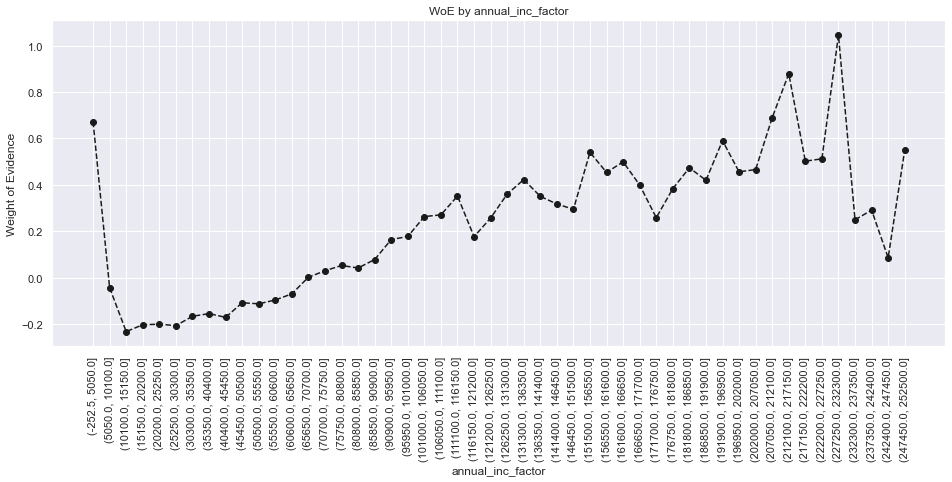

In [152]:
plot_by_woe(df_temp, 90)

In [153]:
X_train['annual_inc:<10k'] = np.where((X_train['annual_inc'] <= 10100), 1, 0)
X_train['annual_inc:10k-45k'] = np.where(((X_train['annual_inc'] > 10100) & (X_train['annual_inc'] <= 45450.0)), 1, 0)
X_train['annual_inc:45k-55k'] = np.where(((X_train['annual_inc'] > 45450) & (X_train['annual_inc'] <= 55550)), 1, 0)
X_train['annual_inc:55k-60k'] = np.where(((X_train['annual_inc'] > 55550) & (X_train['annual_inc'] <= 60600)), 1, 0)
X_train['annual_inc:60k-70k'] = np.where(((X_train['annual_inc'] > 60600) & (X_train['annual_inc'] <= 70700)), 1, 0)
X_train['annual_inc:70k-85k'] = np.where(((X_train['annual_inc'] > 70700) & (X_train['annual_inc'] <= 85850)), 1, 0)
X_train['annual_inc:85k-101k'] = np.where(((X_train['annual_inc'] > 85850) & (X_train['annual_inc'] <= 101000)), 1, 0)
X_train['annual_inc:101k-111k'] = np.where(((X_train['annual_inc'] > 101000) & (X_train['annual_inc'] <= 111100)), 1, 0)
X_train['annual_inc:111k-131k'] = np.where(((X_train['annual_inc'] > 111100) & (X_train['annual_inc'] <= 131300)), 1, 0)
X_train['annual_inc:131k-161k'] = np.where(((X_train['annual_inc'] > 131300) & (X_train['annual_inc'] <= 161600)), 1, 0)
X_train['annual_inc:>161k'] = np.where((X_train['annual_inc'] > 161600), 1, 0)

#### months since last delinquency

In [154]:
df_prep_temp = X_train[pd.notnull(X_train['mths_since_last_delinq'])]

In [155]:
df_prep_temp['mths_since_last_delinq_factor'] = pd.cut(df_prep_temp['mths_since_last_delinq'],50)

In [156]:
df_temp = woe_ordered_continuous(df_prep_temp, 'mths_since_last_delinq_factor', y_train[df_prep_temp.index])
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,dff_prop_good,diff_WoE,IV
0,"(-0.226, 4.52]",9659,0.852676,0.043730,8236.0,1423.0,0.043009,0.048433,-0.118776,NaN,NaN,inf
1,"(4.52, 9.04]",19448,0.856695,0.088049,16661.0,2787.0,0.087004,0.094857,-0.086419,0.004019,0.032357,inf
2,"(9.04, 13.56]",16136,0.860498,0.073054,13885.0,2251.0,0.072508,0.076614,-0.055089,0.003803,0.031330,inf
3,"(13.56, 18.08]",19179,0.863288,0.086831,16557.0,2622.0,0.086461,0.089241,-0.031652,0.002790,0.023437,inf
4,"(18.08, 22.6]",14904,0.862923,0.067476,12861.0,2043.0,0.067160,0.069535,-0.034744,0.000365,0.003091,inf
5,"(22.6, 27.12]",17889,0.865895,0.080990,15490.0,2399.0,0.080889,0.081651,-0.009381,0.002973,0.025363,inf
6,"(27.12, 31.64]",13579,0.868032,0.061477,11787.0,1792.0,0.061552,0.060992,0.009141,0.002136,0.018522,inf
7,"(31.64, 36.16]",15965,0.870655,0.072280,13900.0,2065.0,0.072586,0.070284,0.032235,0.002623,0.023094,inf
8,"(36.16, 40.68]",12200,0.869262,0.055234,10605.0,1595.0,0.055379,0.054287,0.019928,0.001392,0.012307,inf
9,"(40.68, 45.2]",14452,0.876349,0.065430,12665.0,1787.0,0.066137,0.060822,0.083780,0.007087,0.063852,inf


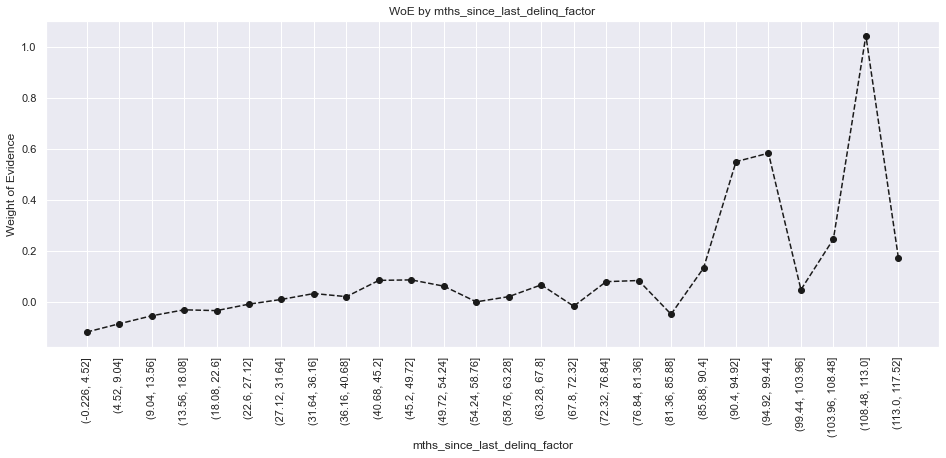

In [157]:
plot_by_woe(df_temp.iloc[:-24,:], 90)

In [158]:
#plot_by_woe(df_temp, 90)

In [159]:
X_train['mths_since_last_delinq:Missing'] = np.where((X_train['mths_since_last_delinq'].isnull()), 1, 0)
X_train['mths_since_last_delinq:0-3'] = np.where(((X_train['mths_since_last_delinq'] >= 0) & (X_train['mths_since_last_delinq'] < 4)), 1, 0)
X_train['mths_since_last_delinq:4-15'] = np.where(((X_train['mths_since_last_delinq'] >= 4) & (X_train['mths_since_last_delinq'] < 16)), 1, 0)
X_train['mths_since_last_delinq:16-31'] = np.where(((X_train['mths_since_last_delinq'] >= 16) & (X_train['mths_since_last_delinq'] < 32)), 1, 0)
X_train['mths_since_last_delinq:32-81'] = np.where(((X_train['mths_since_last_delinq'] >= 32) & (X_train['mths_since_last_delinq'] < 82)), 1, 0)
X_train['mths_since_last_delinq:>82'] = np.where((X_train['mths_since_last_delinq'] >= 82), 1, 0)

## Preprocessing Test Dataset

#### output the train set

In [118]:
X_train_output = X_train
y_train_output = y_train

#### preprocess the test set

In [119]:
# X_train = X_train_data
# y_train = y_train_data
X_train = X_test_data
y_train = y_test_data

Nest Step: Rerun X_train codes from section 9.2.4 creating dummy variables to 9.3.2.7

In [160]:
X_test_output = X_train
y_test_output = y_train

#### save the output data

In [161]:
category_cols = [col for col in X_train_output.columns if X_train_output[col].dtypes == 'category']
print(X_train_output[category_cols])

        mths_since_issue_d_factor   int_rate_factor  funded_amnt_factor
305053               (6.52, 9.28]  (21.745, 22.259]  (13930.0, 14720.0]
50247               (0.862, 3.76]  (13.528, 14.041]   (9980.0, 10770.0]
1630001            (17.56, 20.32]    (12.5, 13.014]  (19460.0, 20250.0]
927626              (25.84, 28.6]  (13.014, 13.528]    (7610.0, 8400.0]
758488             (34.12, 36.88]    (11.987, 12.5]  (29730.0, 30520.0]
...                           ...               ...                 ...
732180             (31.36, 34.12]  (15.068, 15.582]  (21830.0, 22620.0]
110268              (0.862, 3.76]  (18.664, 19.177]   (9980.0, 10770.0]
1692743            (61.72, 64.48]    (23.286, 23.8]  (11560.0, 12350.0]
2229084             (14.8, 17.56]   (10.446, 10.96]  (13930.0, 14720.0]
2219110             (12.04, 14.8]  (14.041, 14.555]    (9190.0, 9980.0]

[1808534 rows x 3 columns]


In [162]:
X_train_output = X_train_output.drop(category_cols, axis=1)
X_test_output = X_test_output.drop(category_cols, axis=1)

In [163]:
X_train_output.shape, y_train_output.shape, X_test_output.shape, y_test_output.shape

((1808534, 333), (1808534,), (452134, 333), (452134,))

In [164]:
X_train_output.to_csv(data_path + "/" + "loan_data_X_train.csv")
y_train_output.to_csv(data_path + "/" + "loan_data_y_train.csv")
X_test_output.to_csv(data_path + "/" + "loan_data_X_test.csv")
y_test_output.to_csv(data_path + "/" + "loan_data_y_test.csv")